In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_csv('Smarket.csv')
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [16]:
df['Direction2'] = df['Direction'].map({'Up':1, 'Down':0})
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction2
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up,1
...,...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up,1
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down,0
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up,1
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down,0


# Draw chart of the data

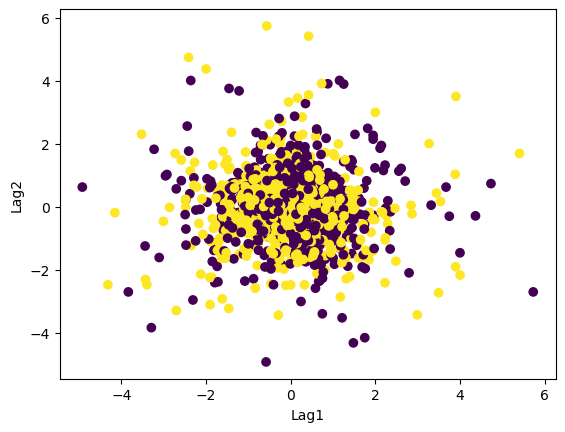

In [17]:
# Draw a scatter plot of the data
plt.scatter(df['Lag1'], df['Lag2'], c=df['Direction2'])
plt.xlabel('Lag1')
plt.ylabel('Lag2')
plt.show()

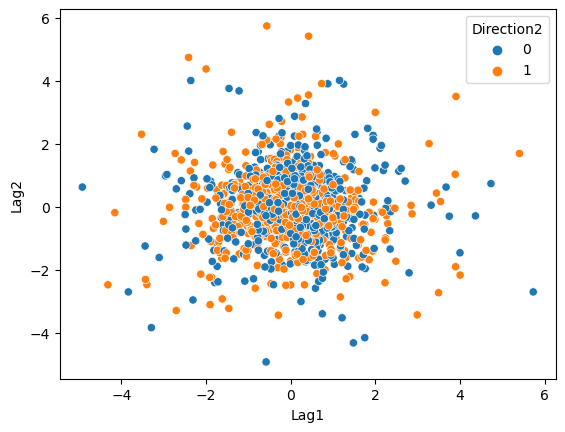

In [22]:
# Use seaborn to draw a scatter plot of the data
import seaborn as sns
sns.scatterplot(x='Lag1', y='Lag2', hue='Direction2', data=df)
plt.show()

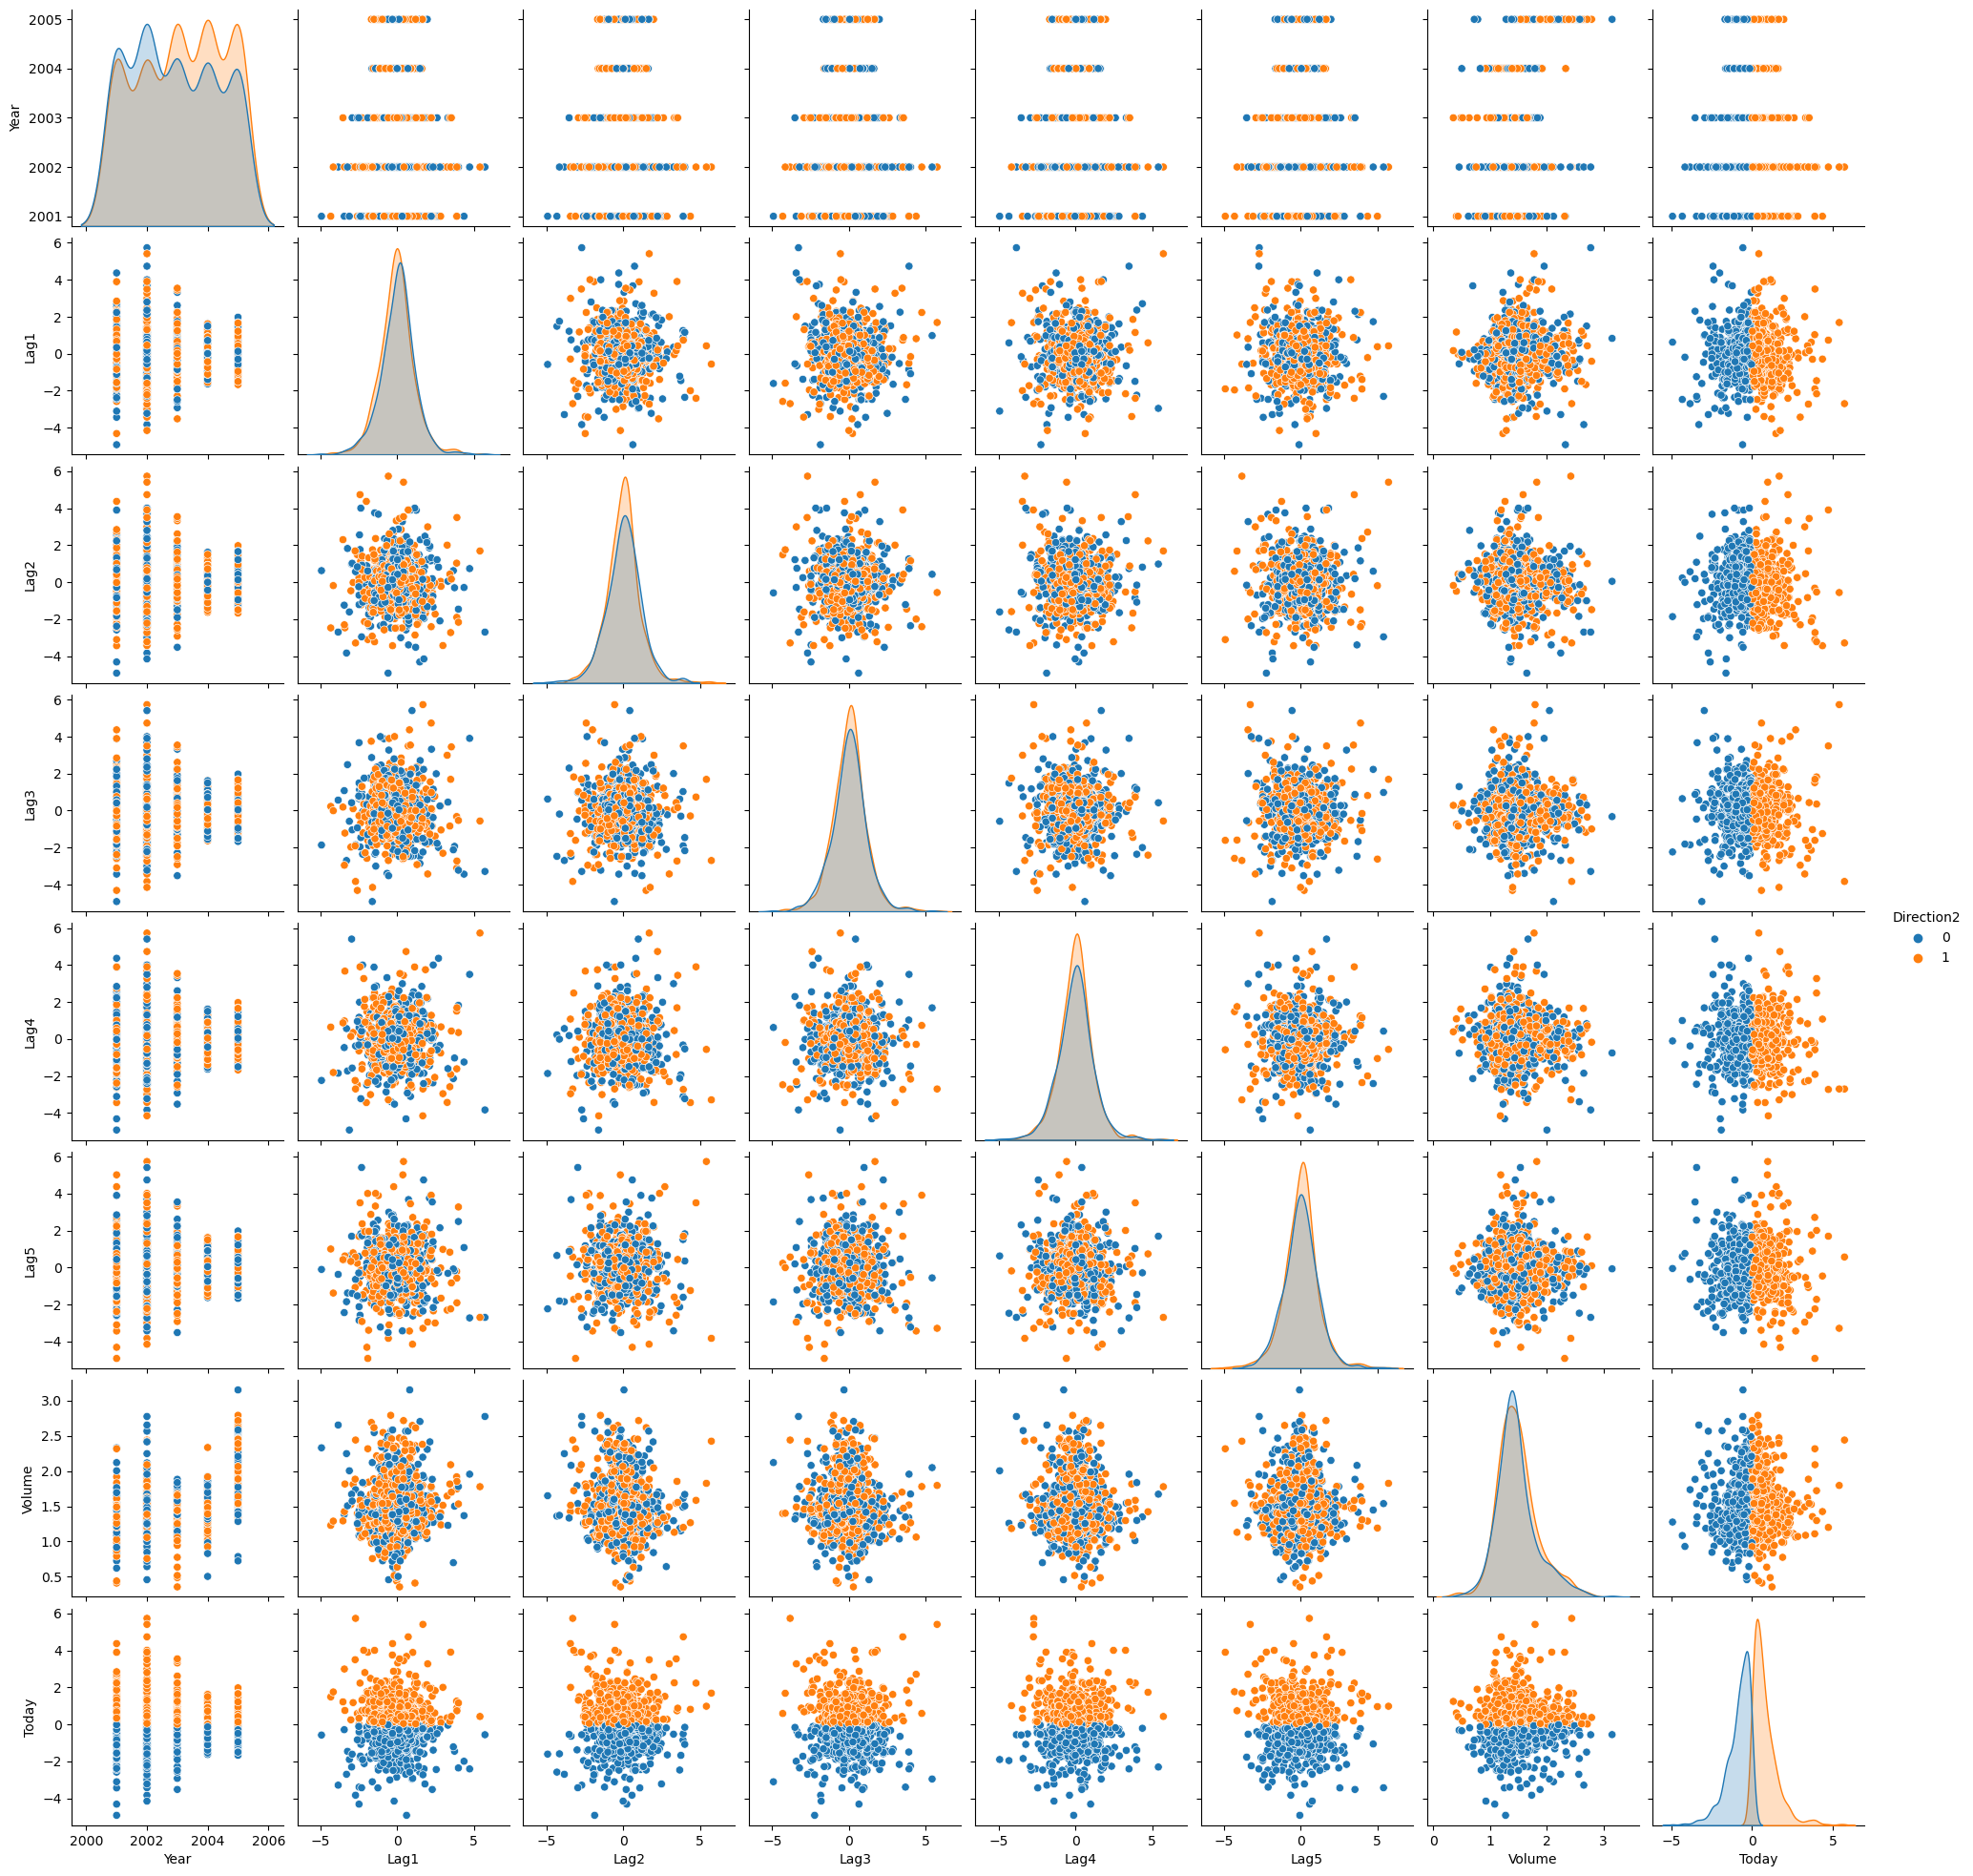

In [23]:
#Draw chart for entire dataset
# sns.pairplot(df, hue='Direction2')
# plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Today', 'Lag1']],
                                                    df['Direction2'], test_size=0.2, random_state=42)

In [25]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.996